<a href="https://colab.research.google.com/github/arthurmls/quant-notebooks/blob/main/Repartition_Portefeuille_(ATDMF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [ ]:
start = pd.to_datetime('2024-12-04')
end = pd.to_datetime('2025-01-08')

In [ ]:

AIRBUS =yf.download('AIR', interval= '1d',start=start,end=end)
HERMES =yf.download('RMS.PA', interval= '1d',start=start,end=end)
VIVENDI =yf.download('VIV', interval= '1d',start=start,end=end)
RHEINMETALL =yf.download('ETR', interval= '1d',start=start,end=end)
NASDAQ =yf.download('NDX', interval= '1d',start=start,end=end)
CISCO =yf.download('CSCO', interval= '1d',start=start,end=end)
APPLE =yf.download('AAPL', interval= '1d',start=start,end=end)
EURDOL =yf.download('USD', interval='1d',start=start,end=end)

CAC = yf.download('^FCHI',start=start,end=end)
DAX = yf.download('^GDAXI',start=start,end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
pfat_open = pd.concat([AIRBUS['Open'],HERMES['Open'],VIVENDI['Open'],RHEINMETALL['Open'],NASDAQ['Open'],CISCO['Open'],APPLE['Open'],EURDOL['Open']],axis=1)

In [ ]:
pfat_open.columns = ['AIRBUS', 'HERMES', 'VIVENDI', 'RHEINMETALL', 'NASDAQ', 'CISCO', 'APPLE', 'EURDOL']

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
HERMES

Price,Close,High,Low,Open,Volume
Ticker,RMS.PA,RMS.PA,RMS.PA,RMS.PA,RMS.PA
Date,,,,,
2024-12-04,2200.0,2207.0,2187.0,2193.0,48604
2024-12-05,2188.0,2220.0,2175.0,2199.0,63220
2024-12-06,2259.0,2277.0,2182.0,2185.0,88440
2024-12-09,2278.0,2309.0,2270.0,2285.0,66301
2024-12-10,2234.0,2271.0,2227.0,2255.0,60544
2024-12-11,2257.0,2275.0,2208.0,2217.0,55578
2024-12-12,2284.0,2304.0,2257.0,2296.0,53155
2024-12-13,2274.0,2309.0,2263.0,2270.0,55503


In [ ]:
HERMES['Daily Return'] = HERMES['Close'].pct_change(1)
CAC['Daily Return'] = CAC['Close'].pct_change(1)

In [ ]:
RHEINMETALL['Daily Return'] = RHEINMETALL['Close'].pct_change(1)
DAX['Daily Return'] = DAX['Close'].pct_change(1)

In [ ]:
EURDOL['Daily Return'] = EURDOL['Close'].pct_change(1)

In [ ]:
from scipy import stats

In [ ]:
beta,alpha,r_value,p_value,std_err = stats.linregress(HERMES['Daily Return'].iloc[1:],
                                                      CAC['Daily Return'].iloc[1:])

In [ ]:
alpha

-0.0004807010659517389

In [ ]:
beta

0.4811308383930269

In [ ]:
r_value

0.8616647600212579

In [ ]:
p_value

5.218127093769649e-07

In [ ]:
std_err

0.06500776198073112

In [ ]:
beta,alpha,r_value,p_value,std_err = stats.linregress(RHEINMETALL['Daily Return'].iloc[1:],
                                                      DAX['Daily Return'].iloc[1:])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 22 and the array at index 1 has size 19

In [ ]:
HERMES['Daily Return'] = HERMES['Close'].pct_change(1)
CAC['Daily Return'] = CAC['Close'].pct_change(1)

In [ ]:
for stock_pfat in (AIRBUS, HERMES, VIVENDI, RHEINMETALL, NASDAQ, CISCO, APPLE, EURDOL ):
    stock_pfat['Normed Return'] = stock_pfat['Open']/stock_pfat.iloc[0]['Open']
    stock_pfat['Open'] = stock_pfat['Open']/stock_pfat.iloc[0]['Open']
    stock_pfat['ER']= stock_pfat['Open'].pct_change(1)
    stock_pfat['Base 100']= (stock_pfat['Open'].pct_change())*100

In [ ]:
AIRBUS

Price,Close,High,Low,Open,Volume,Normed Return,ER,Base 100
Ticker,AIR,AIR,AIR,AIR,AIR,,,
Date,,,,,,,,
2024-12-04,1.000000,70.470001,68.449997,68.449997,169100,1.000000,NaN,NaN
2024-12-05,0.973961,69.949997,68.440002,69.949997,139300,0.973961,-0.026039,-2.603873
2024-12-06,0.962294,69.230003,67.580002,69.230003,166700,0.962294,-0.011980,-1.197954
2024-12-09,0.938532,68.040001,65.919998,68.040001,117000,0.938532,-0.024693,-2.469316
2024-12-10,0.952334,67.370003,65.610001,65.610001,136900,0.952334,0.014706,1.470590
2024-12-11,0.958594,68.400002,67.080002,67.510002,134100,0.958594,0.006574,0.657407
2024-12-12,0.906232,67.279999,63.590000,66.830002,431100,0.906232,-0.054624,-5.462378
2024-12-13,0.899545,63.959999,62.700001,63.430000,269400,0.899545,-0.007379,-0.737945


In [ ]:
pf_100 = pd.concat([NVDA['Base 100'],MSFT['Base 100'],AAPL['Base 100'],AMZN['Base 100']],axis=1)

In [ ]:
pf_100.columns = ['NVDA','MSFT','AAPL','AMZN']

In [ ]:
pf_er = pd.concat([NVDA['ER'],MSFT['ER'],AAPL['ER'],AMZN['ER']],axis=1)

In [ ]:
pf_er.columns = ['NVDA','MSFT','AAPL','AMZN']

In [ ]:
pf_er.tail()

,NVDA,MSFT,AAPL,AMZN
Date,,,,
2025-01-02,0.029935,-0.006928,-0.026236,0.003783
2025-01-03,0.044538,0.011396,-0.002009,0.018027
2025-01-06,0.034332,0.010630,0.006739,0.015255
2025-01-07,-0.062170,-0.012808,-0.011388,-0.024164
2025-01-08,-0.000214,0.005185,0.002023,0.000090


In [ ]:
# AIRBUS
# HERMES
# VIVENDI
# RHEINMETALL
# NASDAQ
# CISCO
# APPLE
# EURDOL

In [ ]:
# Define the allocation for each asset
allocations = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

# Use zip to pair assets with their allocations
asset_allocation = list(zip([AIRBUS, HERMES, VIVENDI, RHEINMETALL, NASDAQ, CISCO, APPLE, EURDOL], allocations))

# Print or use asset_allocation as needed
# For example, to print the asset and its allocation:
for asset, allocation in asset_allocation:


SyntaxError: incomplete input (<ipython-input-37-7be11a455f1b>, line 10)

In [ ]:
list(zip([AIRBUS, HERMES, VIVENDI, RHEINMETALL, NASDAQ, CISCO, APPLE, EURDOL][.125,.125,.125,.125,.125,.125,.125,.125]));

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-38-074f9a580fd0>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  list(zip([AIRBUS, HERMES, VIVENDI, RHEINMETALL, NASDAQ, CISCO, APPLE, EURDOL][.125,.125,.125,.125,.125,.125,.125,.125]));


TypeError: list indices must be integers or slices, not tuple

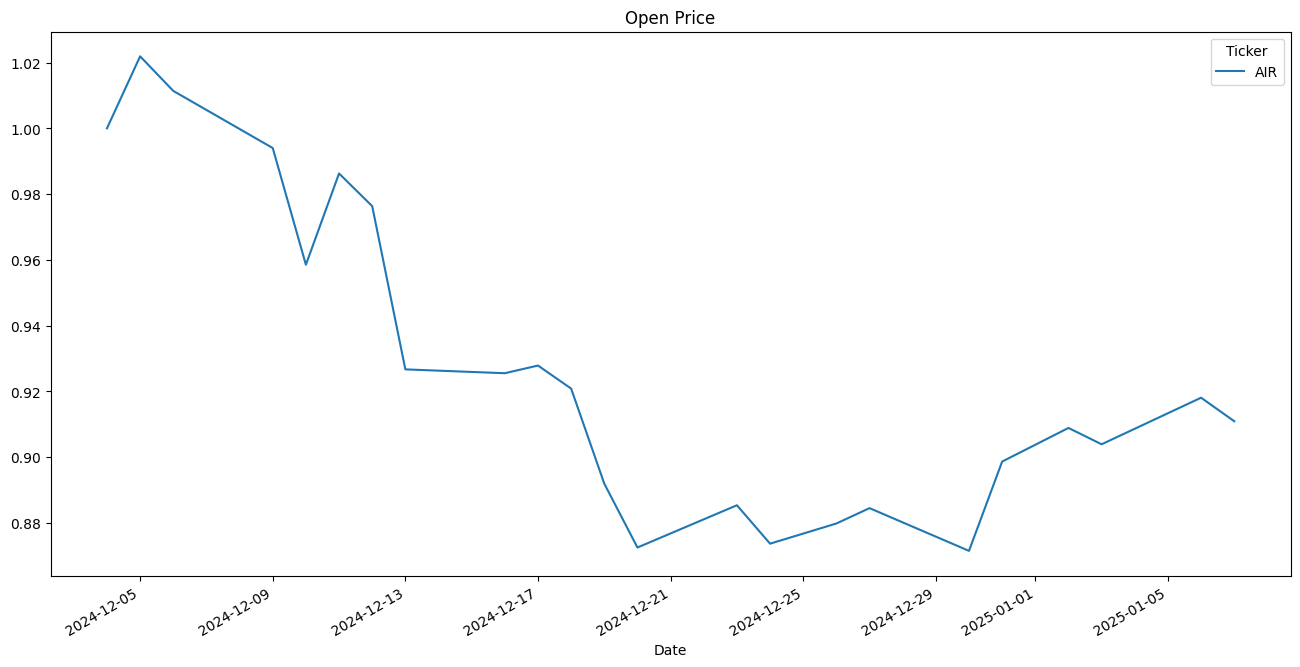

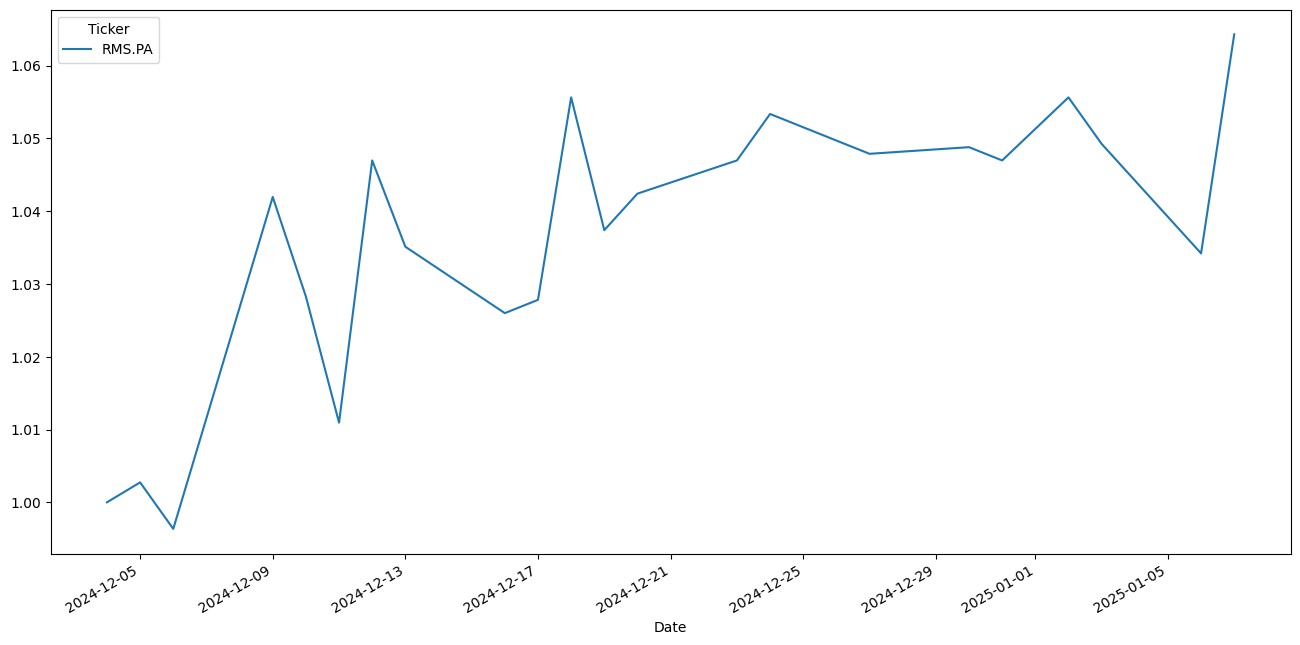

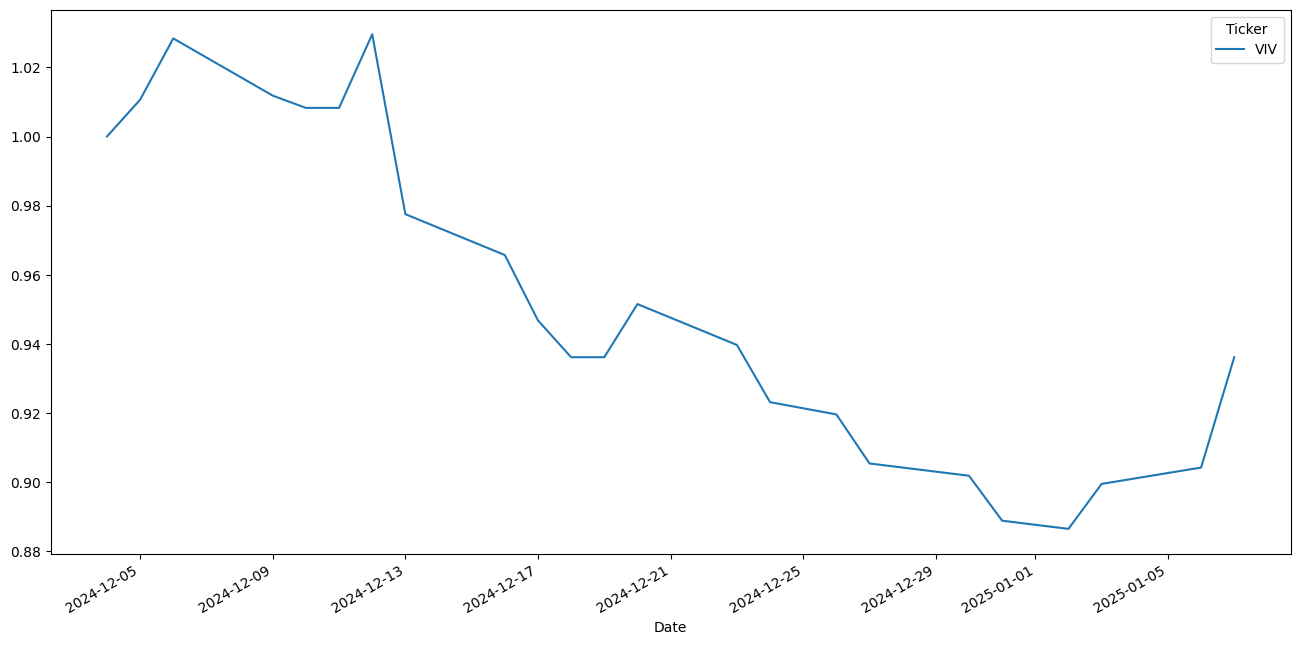

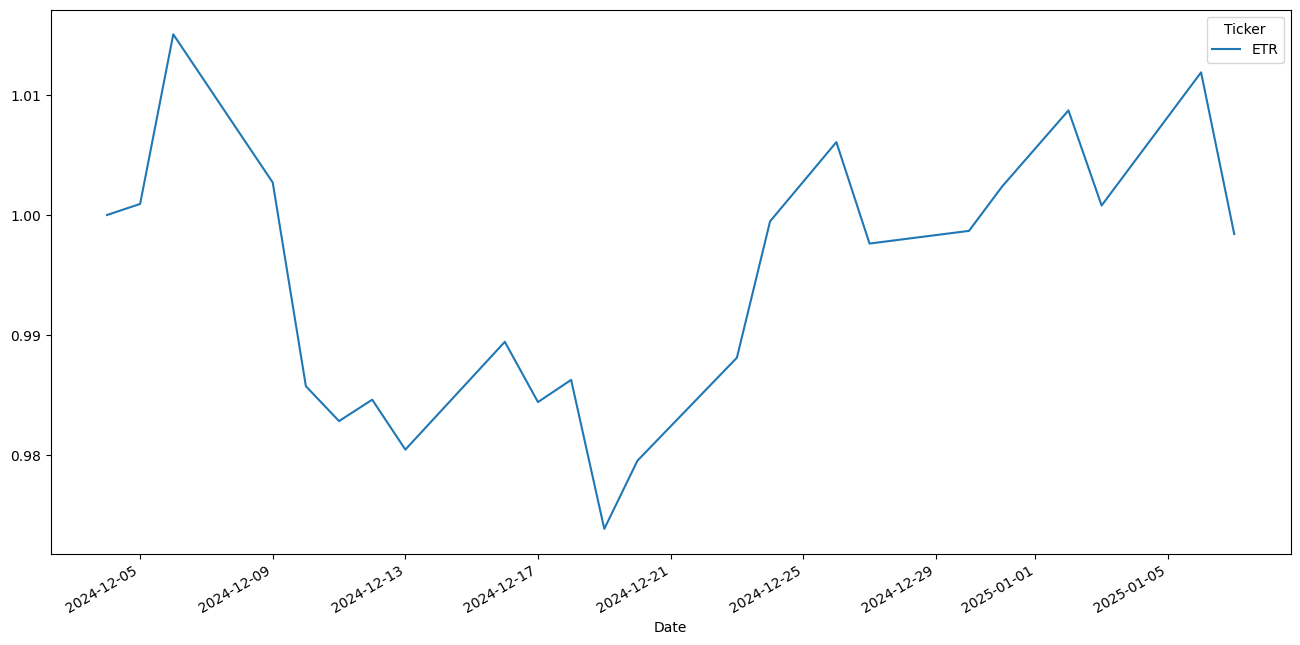

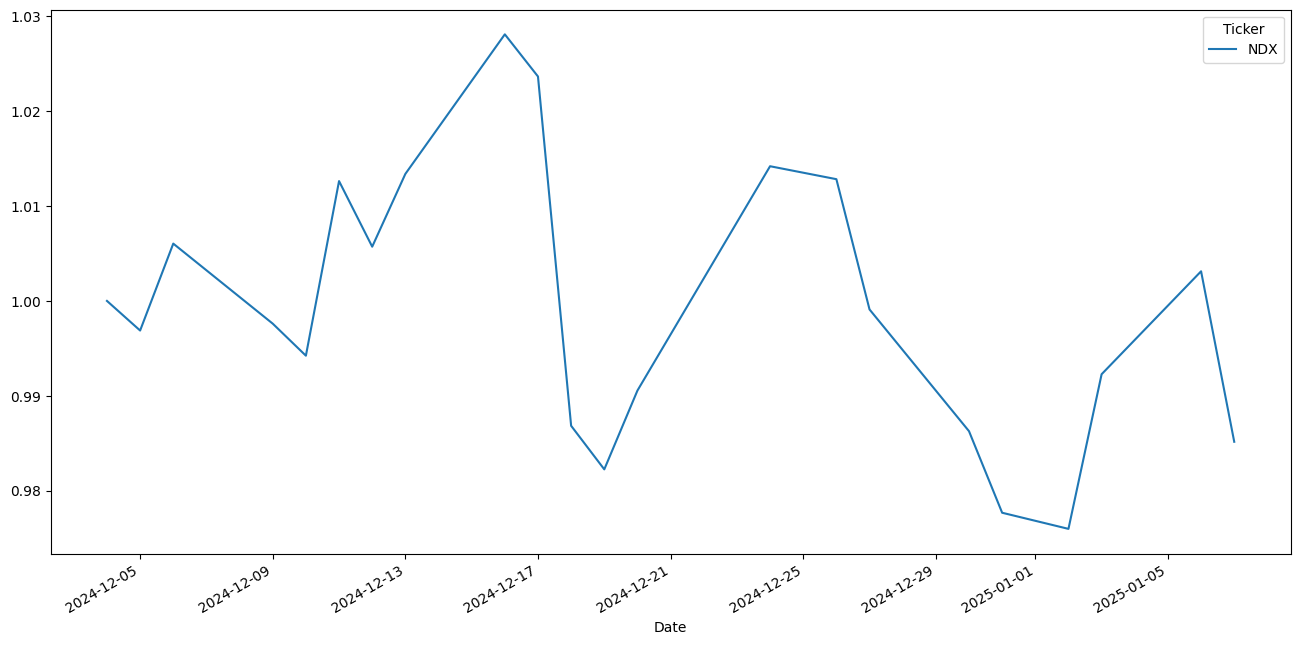

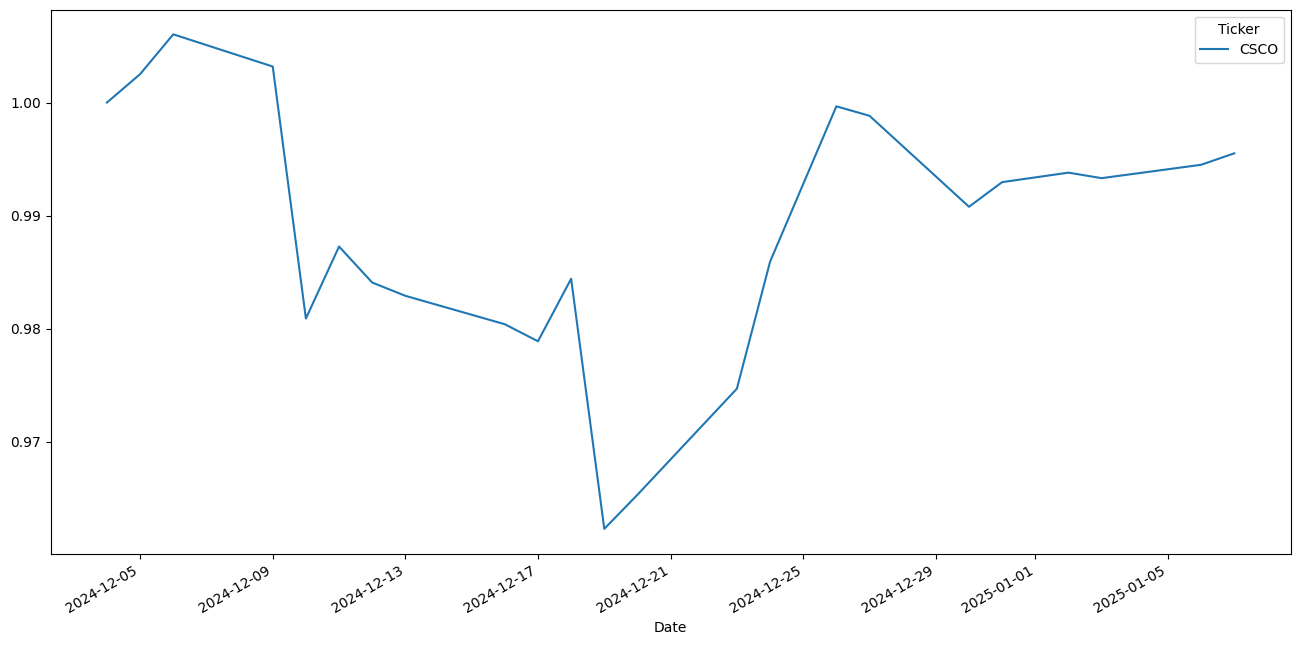

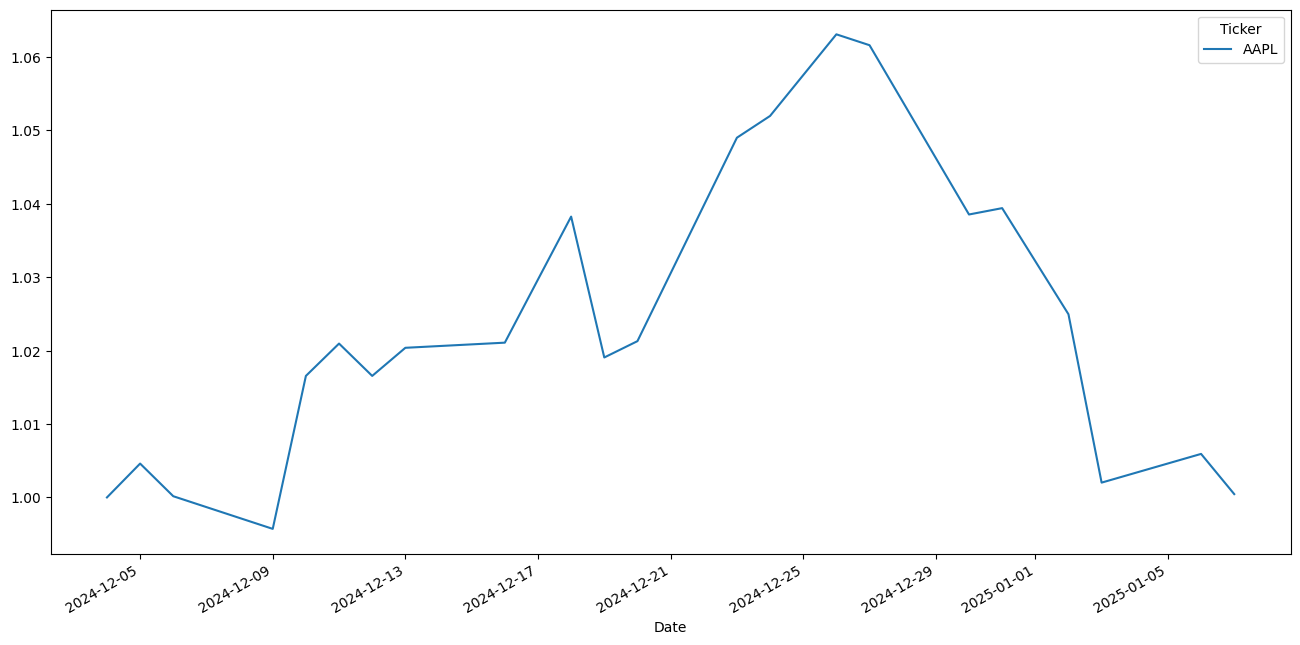

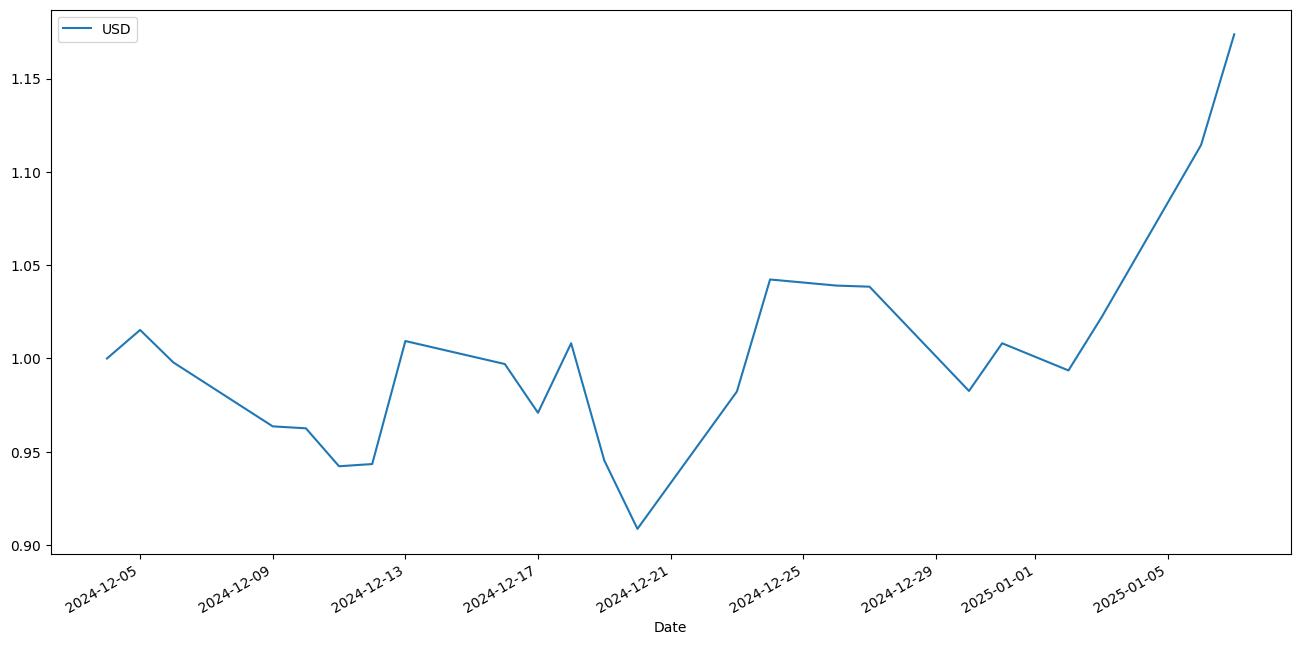

In [ ]:
AIRBUS['Open'].plot(label='AIRBUS',figsize=(16,8),title='Open Price')
HERMES['Open'].plot(label='HERMES',figsize=(16,8))
VIVENDI['Open'].plot(label='VIVENDI',figsize=(16,8))
RHEINMETALL['Open'].plot(label='RHEINMETALL',figsize=(16,8))
NASDAQ['Open'].plot(label='NASDAQ',figsize=(16,8))
CISCO['Open'].plot(label='CISCO',figsize=(16,8))
APPLE['Open'].plot(label='APPLE',figsize=(16,8))
EURDOL['Open'].plot(label='EURDOL',figsize=(16,8))
plt.legend()

In [ ]:
for stock_pfat,allo in zip([AIRBUS, HERMES, VIVENDI, RHEINMETALL, NASDAQ, CISCO, APPLE, EURDOL]):
    stock_pfat['Allocation'] = stock_pfat['Normed Return']*allo

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
for stock_pfat in [AIRBUS, HERMES, VIVENDI, RHEINMETALL, NASDAQ, CISCO, APPLE, EURDOL]:
    stock_pfat['Position Values'] = stock_pfat['Allocation']*1000

KeyError: 'Allocation'

In [ ]:
pfat_value = pd.concat([AIRBUS['Open'],HERMES['Open'],VIVENDI['Open'],RHEINMETALL['Open'], NASDAQ['Open'], CISCO['Open'], APPLE['Open'], EURDOL['Open']], axis=1)

In [ ]:
pfat_open.head()

,AIRBUS,HERMES,VIVENDI,RHEINMETALL,NASDAQ,CISCO,APPLE,EURDOL
Date,,,,,,,,
2024-12-04,68.449997,2193.0,8.45,75.610001,21492.359375,59.236345,242.869995,67.301090
2024-12-05,69.949997,2199.0,8.54,75.680000,21425.220703,59.385330,243.990005,68.330029
2024-12-06,69.230003,2185.0,8.69,76.750000,21622.250000,59.593910,242.910004,67.161233
2024-12-09,68.040001,2285.0,8.55,75.815002,21440.820312,59.425063,241.830002,64.853586
2024-12-10,65.610001,2255.0,8.52,74.529999,21368.179688,58.104062,246.889999,64.783663


In [ ]:
pfa_value.columns = ['NVDA Pos','MSFT Pos','AAPL Pos','AMZN Pos']

In [ ]:
pfat_value['Total Pos'] = pfat_value.sum(axis=1)

In [ ]:
pfat_value['Close'].plot(figsize=(12,6))
plt.title('Valeur totale du portefeuille')

KeyError: 'Close'

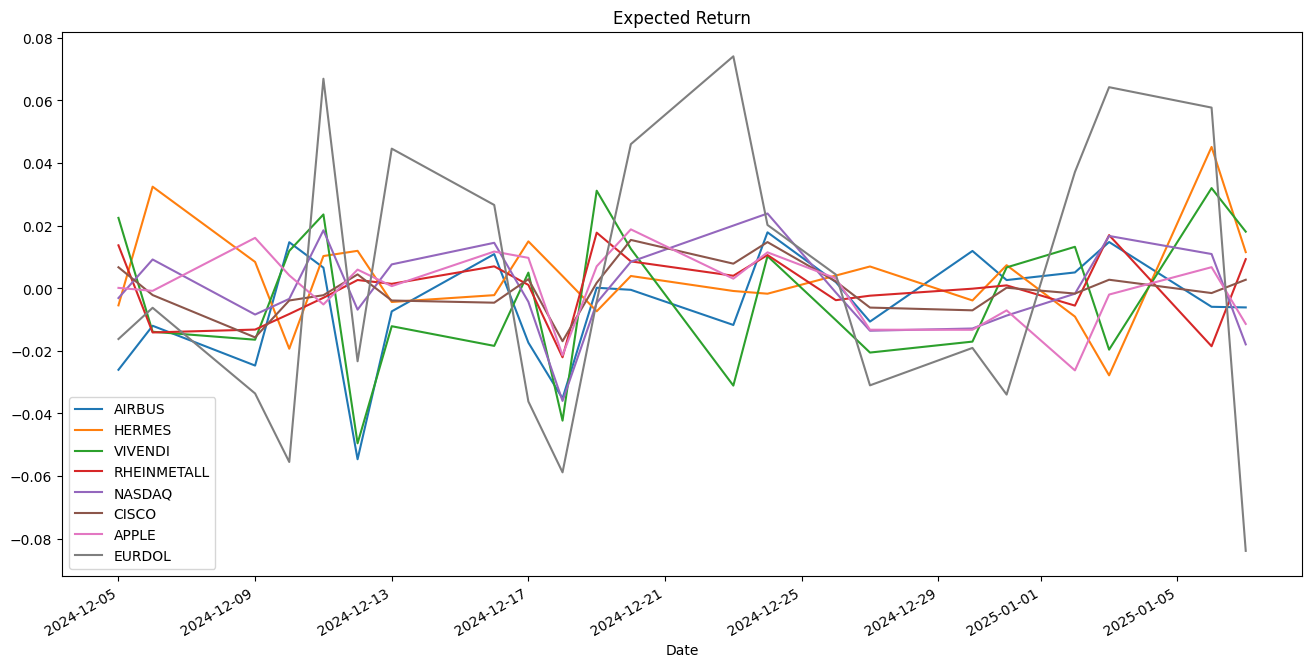

In [ ]:
AIRBUS['ER'].plot(label='AIRBUS',figsize=(16,8),title='Expected Return')
HERMES['ER'].plot(label='HERMES',figsize=(16,8))
VIVENDI['ER'].plot(label='VIVENDI',figsize=(16,8))
RHEINMETALL['ER'].plot(label='RHEINMETALL',figsize=(16,8))
NASDAQ['ER'].plot(label='NASDAQ',figsize=(16,8))
CISCO['ER'].plot(label='CISCO',figsize=(16,8))
APPLE['ER'].plot(label='APPLE',figsize=(16,8))
EURDOL['ER'].plot(label='EURDOL',figsize=(16,8))
plt.legend()

In [ ]:
for pf_100 in (NVDA, MSFT, AAPL, AMZN):
    pf_100['base_100'] = (pf_100['Close']/pf_100['Close'])*100

In [ ]:
pfa_value.head()

,NVDA Pos,MSFT Pos,AAPL Pos,AMZN Pos,Total Pos
Date,,,,,
2024-01-02,300.000000,200.000000,100.000000,400.000000,1000.000000
2024-01-03,296.269325,199.854391,99.251238,396.104872,991.479826
2024-01-04,298.941226,198.419925,97.990731,385.700032,981.051914
2024-01-05,305.785981,198.317475,97.597489,387.487528,989.188473
2024-01-08,325.442186,202.060027,99.956900,397.785669,1025.244781


In [ ]:
pfat_open.drop('Total Pos', axis=1).plot(figsize=(12,6))

KeyError: "['Total Pos'] not found in axis"

In [ ]:
pfa_value['Daily Return'] = pfa_value['Total Pos'].pct_change(1)

In [ ]:
pfa_value.tail()

,NVDA Pos,MSFT Pos,AAPL Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2025-01-02,861.666751,227.416666,131.999906,587.527545,1808.610867,0.012380
2025-01-03,900.043372,230.008242,131.734658,598.119158,1859.905430,0.028361
2025-01-06,930.943956,232.453115,132.622416,607.243412,1903.262899,0.023312
2025-01-07,873.067602,229.475797,131.112148,592.569897,1826.225444,-0.040477
2025-01-08,872.880711,230.665637,131.377387,592.623266,1827.547001,0.000724


In [ ]:
pfa_value['Daily Return'].mean()

0.0025478570697797377

In [ ]:
pfa_value['Daily Return'].std()

0.019529857220526834

<Axes: ylabel='Frequency'>

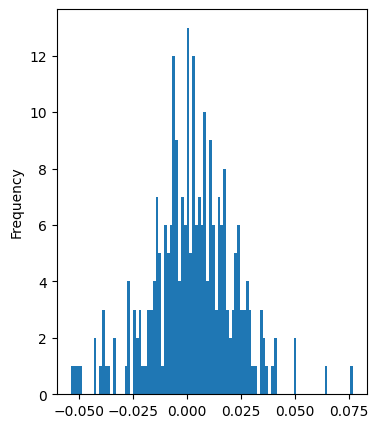

In [ ]:
pfa_value['Daily Return'].plot(kind='hist',bins=100,figsize=(4,5))

<Axes: ylabel='Density'>

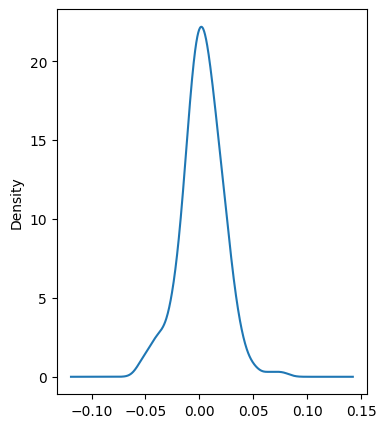

In [ ]:
pfa_value['Daily Return'].plot(kind='kde',figsize=(4,5))

In [ ]:
cumulative_return = 100*(pfa_value['Total Pos'][-1]/pfa_value['Total Pos'][0] - 1)

<ipython-input-108-dda57e5b2704>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = 100*(pfa_value['Total Pos'][-1]/pfa_value['Total Pos'][0] - 1)


In [ ]:
cumulative_return

82.75470010585808

In [ ]:
pfa_value['Total Pos'][-1]

<ipython-input-110-7d307ba51ab2>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pfa_value['Total Pos'][-1]


1827.547001058581

In [ ]:
SR = pfa_value['Daily Return'].mean()/pfa_value['Daily Return'].std()

In [ ]:
SR

0.13045958508605046

In [ ]:
ASR = (252**0.5)*SR

In [ ]:
ASR

2.070981709694163

In [ ]:
import numpy as np
np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037

In [ ]:
mean_daily_ret = pfa_value.pct_change(1).mean()
mean_daily_ret

,0
NVDA Pos,0.004725
MSFT Pos,0.000636
AAPL Pos,0.001165
AMZN Pos,0.001692
Total Pos,0.002548
Daily Return,1.717299


In [ ]:
pfa_value.pct_change(1).corr()

,NVDA Pos,MSFT Pos,AAPL Pos,AMZN Pos,Total Pos,Daily Return
NVDA Pos,1.000000,0.463275,0.251099,0.447317,0.936510,-0.063245
MSFT Pos,0.463275,1.000000,0.472147,0.689270,0.674649,-0.117314
AAPL Pos,0.251099,0.472147,1.000000,0.336312,0.389000,-0.118789
AMZN Pos,0.447317,0.689270,0.336312,1.000000,0.711780,-0.061298
Total Pos,0.936510,0.674649,0.389000,0.711780,1.000000,-0.085648
Daily Return,-0.063245,-0.117314,-0.118789,-0.061298,-0.085648,1.000000


<Axes: xlabel='Date'>

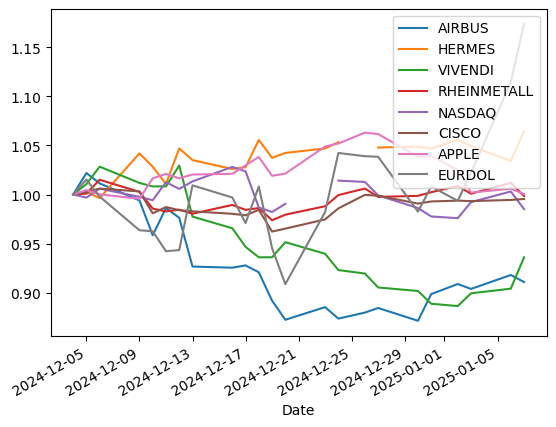

In [ ]:
pfat_open = pfat_open/pfat_open.iloc[0]
pfat_open.plot()

In [ ]:
log_ret = np.log(pfa_value/pfa_value.shift(1))
log_ret.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,NVDA Pos,MSFT Pos,AAPL Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2024-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,-0.012514,-0.000728,-0.007516,-0.009786,-0.008557,NaN
2024-01-04,0.008978,-0.007203,-0.012782,-0.026619,-0.010573,0.210606
2024-01-05,0.022638,-0.000516,-0.004021,0.004624,0.008260,NaN
2024-01-08,0.062299,0.018696,0.023887,0.026230,0.035802,1.480455


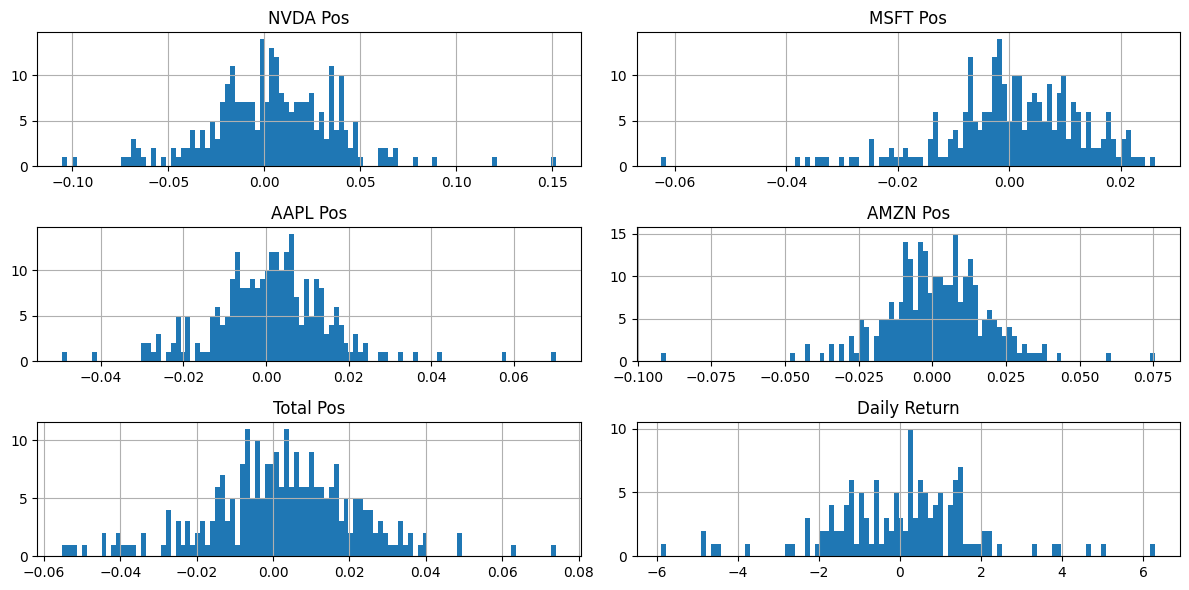

In [ ]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [ ]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NVDA Pos,256.0,0.004172,0.032944,-0.105412,-0.016140,0.004039,0.024518,0.151870
MSFT Pos,256.0,0.000557,0.012584,-0.062437,-0.006107,0.001166,0.009179,0.026252
AAPL Pos,256.0,0.001066,0.014060,-0.049366,-0.006811,0.001586,0.008750,0.070131
AMZN Pos,256.0,0.001536,0.017663,-0.091948,-0.008630,0.000854,0.012174,0.075726
Total Pos,256.0,0.002355,0.019501,-0.055245,-0.007890,0.002929,0.014504,0.074046
Daily Return,134.0,0.004685,1.830009,-5.884532,-1.130415,0.218203,1.051350,6.302655


In [ ]:
log_ret.mean() * 252

,0
NVDA Pos,1.051329
MSFT Pos,0.140423
AAPL Pos,0.268640
AMZN Pos,0.386952
Total Pos,0.593553
Daily Return,1.180577


In [ ]:
# Covariance des colonnes par paires
log_ret.cov()

,NVDA Pos,MSFT Pos,AAPL Pos,AMZN Pos,Total Pos,Daily Return
NVDA Pos,0.001085,0.000193,0.000119,0.000260,0.000602,0.001582
MSFT Pos,0.000193,0.000158,0.000084,0.000153,0.000166,-0.004518
AAPL Pos,0.000119,0.000084,0.000198,0.000085,0.000108,-0.004588
AMZN Pos,0.000260,0.000153,0.000085,0.000312,0.000245,-0.006249
Total Pos,0.000602,0.000166,0.000108,0.000245,0.000380,-0.002297
Daily Return,0.001582,-0.004518,-0.004588,-0.006249,-0.002297,3.348932


In [ ]:
log_ret.cov()*252 # multiplier par les jours ouvrables

,NVDA Pos,MSFT Pos,AAPL Pos,AMZN Pos,Total Pos,Daily Return
NVDA Pos,0.273496,0.048641,0.029882,0.065641,0.151696,0.398582
MSFT Pos,0.048641,0.039905,0.021144,0.038673,0.041812,-1.138631
AAPL Pos,0.029882,0.021144,0.049816,0.021333,0.027200,-1.156286
AMZN Pos,0.065641,0.038673,0.021333,0.078623,0.061815,-1.574791
Total Pos,0.151696,0.041812,0.027200,0.061815,0.095833,-0.578739
Daily Return,0.398582,-1.138631,-1.156286,-1.574791,-0.578739,843.930857


In [ ]:
# Règlage du seed (optionnel)
np.random.seed(101)

# Colonnes d'actions (Stocks)
print('Stocks')
print(pfa_value.columns)
print('\n')

# Créer des poids aléatoires
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Re-pondération des Poids
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Select the relevant columns from log_ret
relevant_log_ret = log_ret[['NVDA Pos', 'MSFT Pos', 'AAPL Pos', 'AMZN Pos']]

# Rendement attendu ou escompté
print('Expected Portfolio Return')
exp_ret = np.sum(relevant_log_ret.mean()* weights) *252
print(exp_ret)
print('\n')

# variance attendue ou escomptée
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(relevant_log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Ratio de Sharpe
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['NVDA Pos', 'MSFT Pos', 'AAPL Pos', 'AMZN Pos', 'Total Pos',
       'Daily Return'],
      dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.5415896256921938


Expected Volatility
0.2885483599924046


Sharpe Ratio
1.8769457768065292


In [ ]:
num_ports = 15000

# Only consider the 4 stock position columns
stock_columns = ['NVDA Pos', 'MSFT Pos', 'AAPL Pos', 'AMZN Pos']
all_weights = np.zeros((num_ports, len(stock_columns)))  # Change here to 4 columns
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Créer des poids aléatoires
    weights = np.array(np.random.random(4))

    # (re)Pondération des poids
    weights = weights / np.sum(weights)

    # Sauvegarde des Poids
    all_weights[ind,:] = weights

    # rendement attendu
    ret_arr[ind] = np.sum((relevant_log_ret.mean() * weights) *252)

    # variance Attendue
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(relevant_log_ret.cov() * 252, weights)))

    # Ratio de Sharpe
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [ ]:
sharpe_arr.max()

2.1623323635136167

In [ ]:
sharpe_arr.argmax()

11063

In [ ]:
all_weights[11062,:]

array([0.12502066, 0.01670412, 0.30381328, 0.55446193])

Tracer les données

In [ ]:
max_sr_ret = ret_arr[11063]
max_sr_vol = vol_arr[11063]

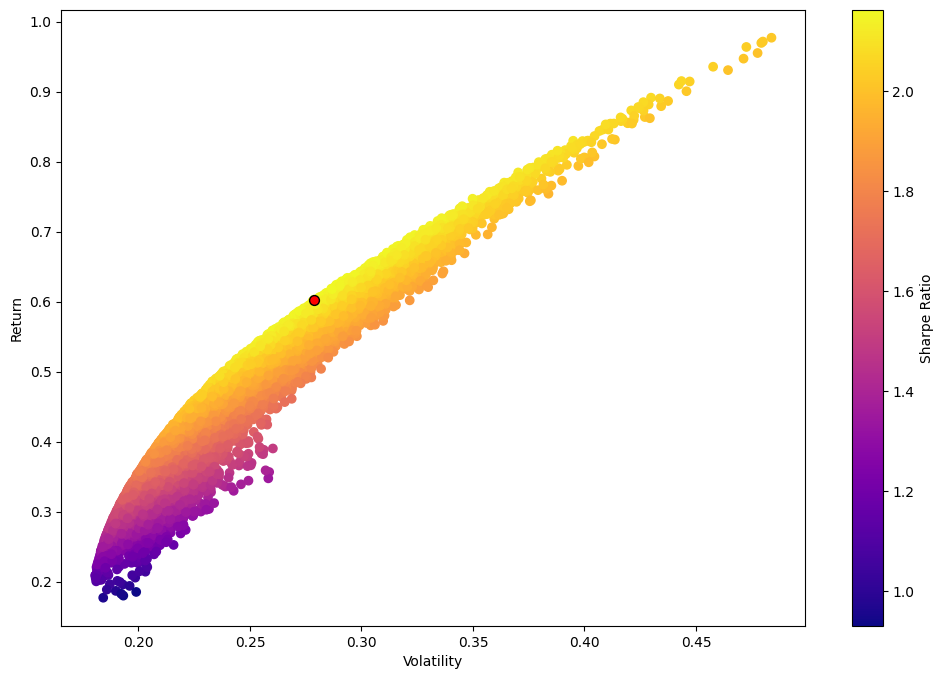

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Ajouter un point rouge pour le SR max
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

Fonctionnaliser les opérations de rendement et de SR

In [ ]:
def get_ret_vol_sr(weights):
    """
    Prends en argument les poids, retourne un tableau de rendement,
    volatilité et Ratio de Sharpe
    """
    weights = np.array(weights)
    ret = np.sum(relevant_log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(relevant_log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [ ]:
from scipy.optimize import minimize

In [ ]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [ ]:
# Contraintes
def check_sum(weights):
    '''
    Retourne 0 si la somme des poids vaut 1.0
    '''
    return np.sum(weights) - 1

In [ ]:
# Par convention de fonction de minimisation, il devrait s'agir d'une fonction qui retourne zéro pour certaines conditions
cons = ({'type':'eq','fun': check_sum})

In [ ]:
# 0-1 pour chaque poids
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [ ]:
# Hypothèse initiale (répartition égale)
init_guess = [0.25,0.25,0.25,0.25]

In [ ]:
# Sequential Least Squares Programming (SLSQP)
# Programmation séquentielle des moindres carrés
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [ ]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.1635787031576417
       x: [ 4.220e-01  9.345e-17  3.786e-01  1.995e-01]
     nit: 9
     jac: [ 6.664e-05  4.592e-01 -4.873e-05 -4.858e-05]
    nfev: 48
    njev: 9

In [ ]:
opt_results.x

array([4.21975884e-01, 9.34530006e-17, 3.78566325e-01, 1.99457791e-01])

In [ ]:
get_ret_vol_sr(opt_results.x)

array([0.62251393, 0.28772419, 2.1635787 ])

In [ ]:
# Nos rendements vont de 0 à 0.3
# Créer un nombre de points linéairement espacés pour calculer x dessus
frontier_y = np.linspace(0,0.3,100) # Changez 100 à un chiffre inférieur pour les ordinateurs plus lents !

In [ ]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]

In [ ]:
frontier_volatility = []

for possible_return in frontier_y:
    # contraintes
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})

    result = minimize(minimize_volatility,init_guess,method='SLSQP',
                       bounds=bounds,constraints=cons)

    frontier_volatility.append(result['fun'])

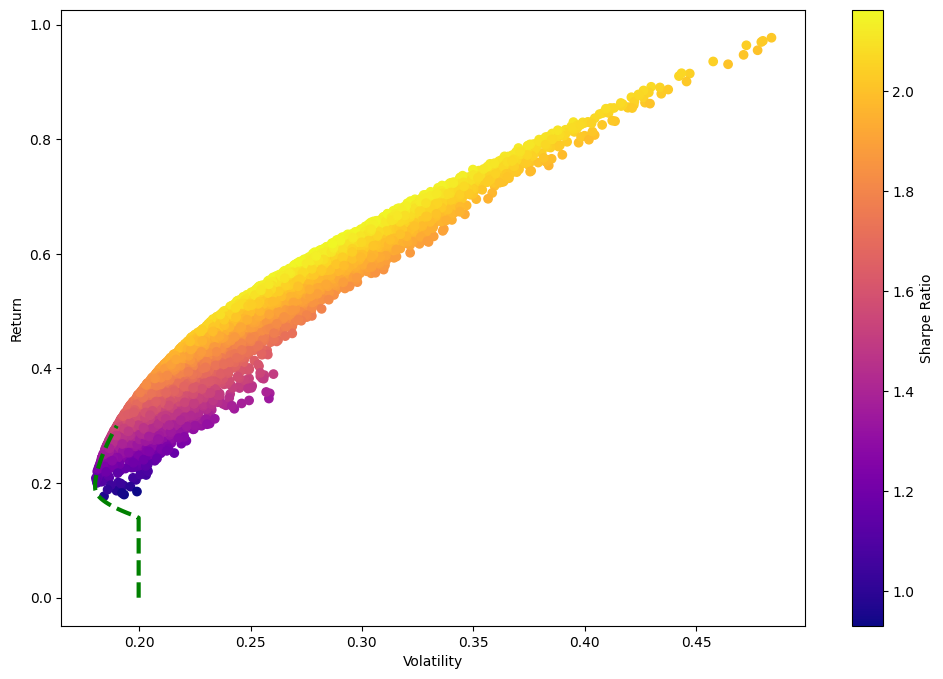

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Ajouter une ligne de frontière
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)


CAPM - Capital Asset Pricing Model
ou Le Modèle d'Evaluation Des Actifs Financiers (MEDAF)

In [ ]:
# Modèle CAPM en tant que simple régression linéaire

In [ ]:
from scipy import stats

In [ ]:
import pandas_datareader as web

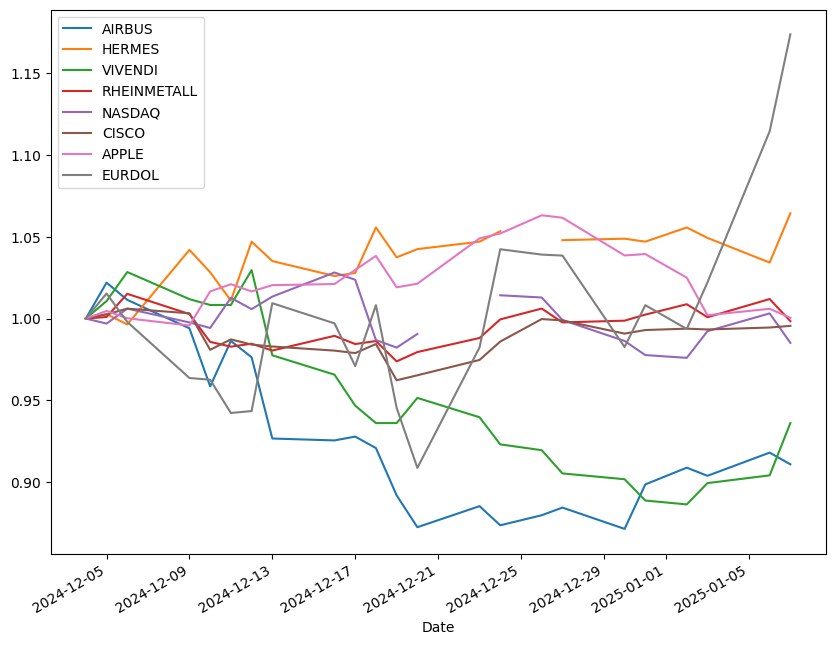

In [ ]:
pfat_open.plot(label='Open Price',figsize=(10,8))
plt.legend()

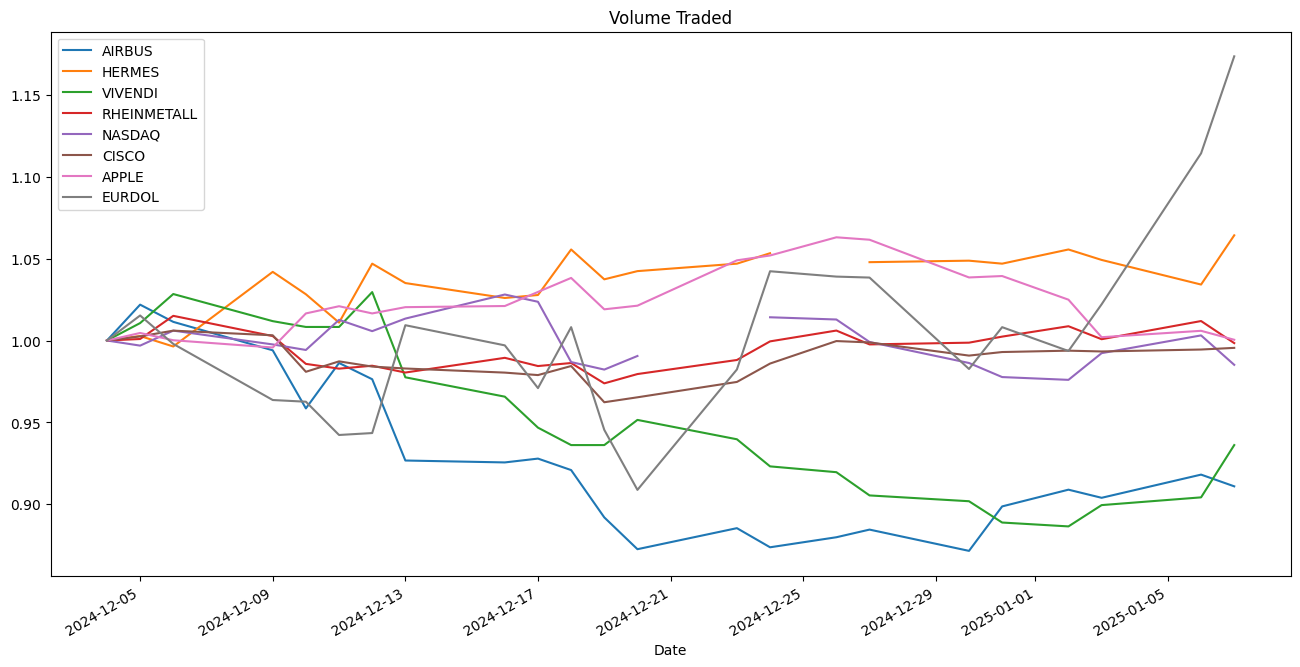

In [ ]:
pfat_open.plot(label='Tesla',figsize=(16,8),title='Volume Traded')
plt.legend()

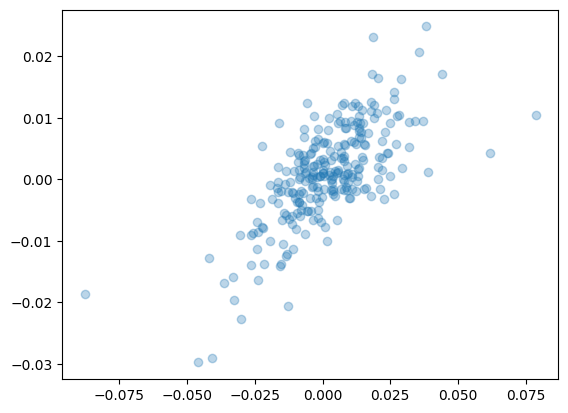

In [ ]:
plt.scatter(stock_pfa['ER'],SPY['ER'], alpha=0.3)

<Axes: >

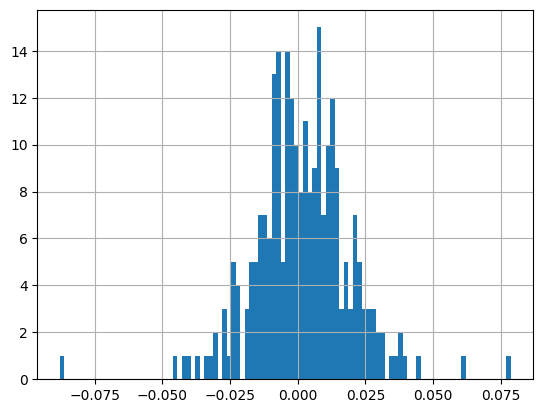

In [ ]:
stock_pfa['ER'].hist(bins=100)

<Axes: >

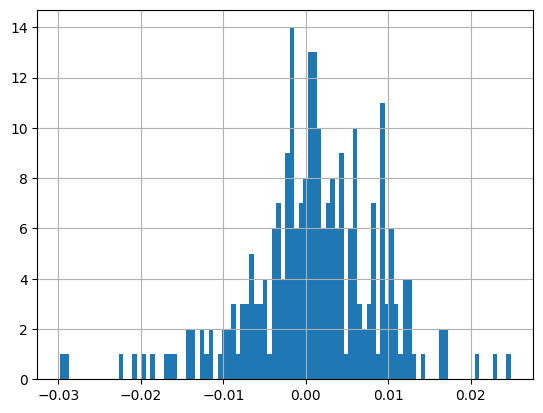

In [ ]:
SPY['ER'].hist(bins=100)

In [ ]:
beta,alpha,r_value,p_value,std_err = stats.linregress(stock_pfa['ER'].iloc[1:],SPY['ER'].iloc[1:])

In [ ]:
beta

0.3125821573875096

In [ ]:
alpha

0.00041551606933687305

In [ ]:
r_value

0.6965420098869404

In [ ]:
SPY['ER'].head()

,ER
Date,
2024-01-02,NaN
2024-01-03,-0.008167
2024-01-04,-0.003221
2024-01-05,0.001370
2024-01-08,0.014276


In [ ]:
noise = np.random.normal(0,0.001,len(SPY['ER'].iloc[1:]))

In [ ]:
noise

array([ 2.67255826e-04,  8.18683885e-04, -1.80356316e-03, -6.23510414e-04,
       -1.88855680e-04,  4.04582691e-04,  1.55653720e-03,  1.64400007e-03,
       -2.82271210e-04, -1.60109630e-03,  7.56034816e-04,  2.56860068e-05,
        3.72337115e-04,  1.36693936e-03,  4.70624960e-04,  3.75051958e-04,
        1.25642070e-03, -4.32566197e-04,  1.71991818e-04,  4.87256741e-04,
        1.18342118e-03, -1.08021668e-03, -9.92020409e-04,  4.34830722e-04,
       -5.44846415e-04,  1.37999519e-03,  9.66047367e-04, -5.95590698e-04,
       -5.06809206e-04,  1.18199870e-03, -1.53384954e-04, -8.19067564e-04,
       -3.59948210e-04, -5.44109194e-04,  6.17605587e-05,  1.64879451e-03,
       -1.88224677e-03,  1.30824470e-03,  1.57488140e-04,  1.63675930e-03,
        1.28403652e-04, -1.57834745e-03, -2.63320413e-04,  3.50184447e-05,
        1.70413598e-04, -4.73844716e-04,  2.23535926e-05, -1.64082490e-03,
        1.51885003e-03,  2.82366134e-05,  1.66711459e-04,  4.23095904e-04,
       -2.87692841e-05, -